In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import setuptools.dist
from tensorflow.keras.datasets import mnist
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

In [13]:
(X_train,Y_train),(X_test,Y_test)= mnist.load_data()
print(X_train.shape,X_test.shape)
X_train,X_test= X_train/255.,X_test/255.

(60000, 28, 28) (10000, 28, 28)


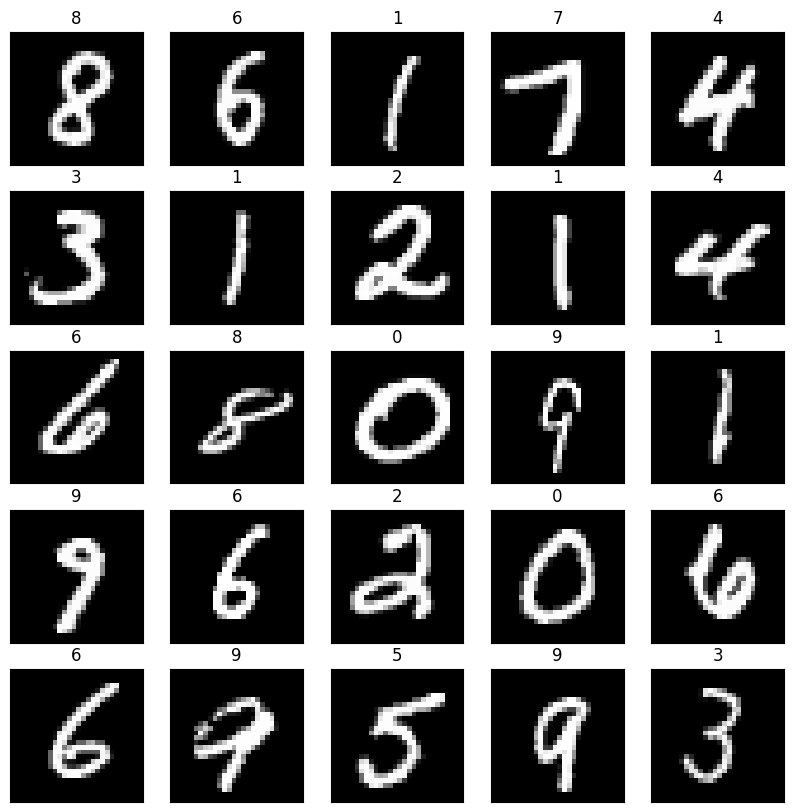

In [14]:
n= X_train.shape[0]
fig,axs= plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        p= np.random.randint(0,n)
        axs[i,j].imshow(X_train[p,:,:],cmap='grey')
        axs[i,j].set(title=(f"{Y_train[p]}"),xticks=[],yticks=[])

plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


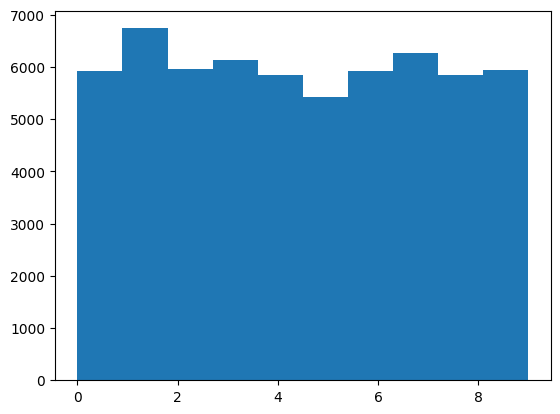

In [15]:
print(np.unique(Y_train,return_counts=True))
plt.hist(Y_train)
plt.show()

In [16]:
X_train= np.reshape(X_train,(-1,28*28))[:10000]
Y_train= Y_train[:10000]

X_test= np.reshape(X_test,(-1,28*28))


In [29]:
lgr= LogisticRegression(tol=0.01)
lgr.fit(X_train,Y_train)

LogisticRegression(tol=0.01)

0.8512


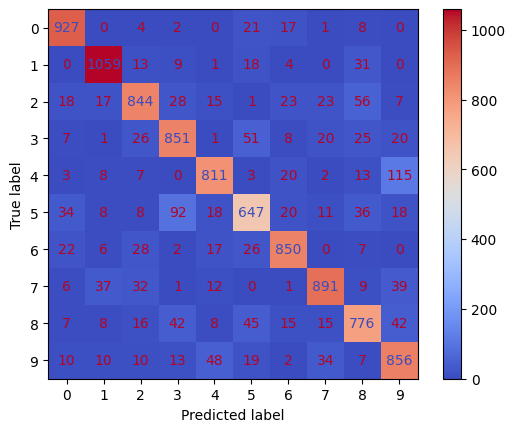

In [30]:
print(lgr.score(X_test,Y_test))
cm_display= ConfusionMatrixDisplay.from_estimator(lgr,X_test,Y_test,cmap='coolwarm')

In [31]:
param_grid= {'C':[1e-15,0.1,0.5,1],'solver':['saga','lbfgs'],'penalty':['l1','l2'],'fit_intercept':[True,False]}
grid= GridSearchCV(estimator=lgr,param_grid=param_grid,cv=2,verbose=2)

grid.fit(X_train,Y_train)

Fitting 2 folds for each of 32 candidates, totalling 64 fits
[CV] END C=1e-15, fit_intercept=True, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=1e-15, fit_intercept=True, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=1e-15, fit_intercept=True, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1e-15, fit_intercept=True, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1e-15, fit_intercept=True, penalty=l2, solver=saga; total time=   0.7s
[CV] END C=1e-15, fit_intercept=True, penalty=l2, solver=saga; total time=   0.9s
[CV] END C=1e-15, fit_intercept=True, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END C=1e-15, fit_intercept=True, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=1e-15, fit_intercept=False, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=1e-15, fit_intercept=False, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=1e-15, fit_intercept=False, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1e-15, fit_interce

c:\Users\prith\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
16 fits failed out of a total of 64.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\prith\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\prith\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\prith\AppDat

GridSearchCV(cv=2, estimator=LogisticRegression(tol=0.01),
             param_grid={'C': [1e-15, 0.1, 0.5, 1],
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2'], 'solver': ['saga', 'lbfgs']},
             verbose=2)

In [37]:
print(f"Best parameters were: {grid.best_params_}, with a score of {grid.best_score_}")

Best parameters were: {'C': 0.1, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'saga'}, with a score of 0.908


In [38]:
grid.score(X_test,Y_test)

0.9114

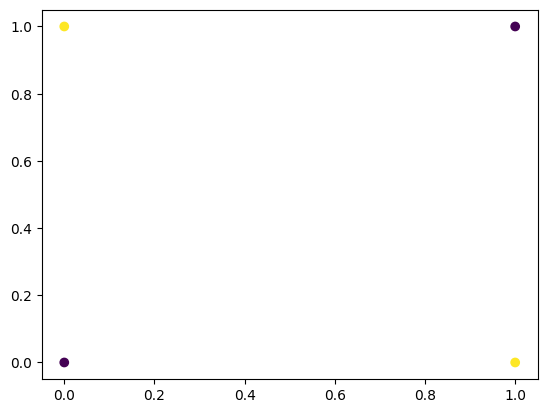

In [21]:
deg=2
X= np.array([[0,0],[0,1],[1,0],[1,1]])
X_poly= PolynomialFeatures(degree=deg).fit_transform(X)
Y= np.array([0,1,1,0])

plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()


In [32]:
lgr= LogisticRegression(penalty=None,solver='saga',fit_intercept=True)
lgr.fit(X_poly,Y)

c:\Users\prith\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='saga')

In [33]:
lgr.score(X_poly,Y)

1.0

In [34]:
lgr.predict(X_poly)

array([0, 1, 1, 0])

In [35]:
lgr.coef_

array([[-0.65781492,  1.47914313,  1.4811531 ,  1.47914313, -6.52200213,
         1.4811531 ]])

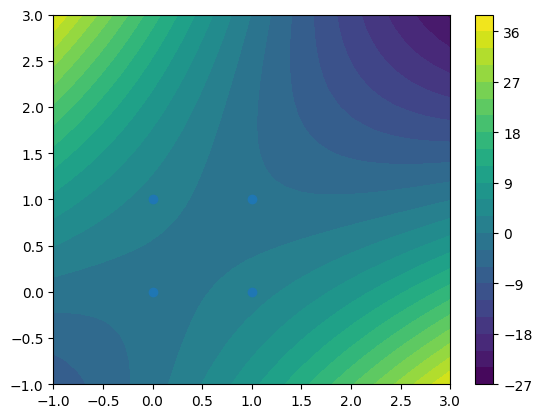

In [36]:
xs=np.linspace(-1,3,30)
ys=np.linspace(-1,3,30)
X_mesh,Y_mesh= np.meshgrid(xs,ys)
coords= np.column_stack(((X_mesh.ravel(),Y_mesh.ravel())))
Z= lgr.decision_function(PolynomialFeatures(degree=deg).fit_transform(coords)).reshape(X_mesh.shape)

im= plt.contourf(X_mesh,Y_mesh,Z,levels=20)
plt.scatter(X[:,0],X[:,1])
plt.colorbar(im)
plt.show()